In [2]:
from typing import TypedDict, Annotated
from pydantic import BaseModel 
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.graph import add_messages # prebuilt reducer function to append
load_dotenv()
llm=ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

In [3]:
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [4]:
def chat_node(state:ChatState):
    messages=state['messages']
    response=llm.invoke(messages)

    return {'messages':response}
  

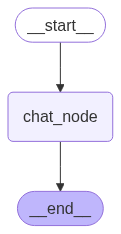

In [5]:
graph=StateGraph(ChatState)

#add nodes
graph.add_node('chat_node',chat_node)

#add edges
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

graph.compile()

In [6]:

chatbot=graph.compile()
initial_state={
    'messages':[HumanMessage(content="what is the capital of india?")]
}

chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='what is the capital of india?', additional_kwargs={}, response_metadata={}, id='39ed8f68-0bae-40d1-ab94-0682989bccc0'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-lite', 'safety_ratings': []}, id='run--1050bedd-a1fb-49a1-af8a-8b02d595fb02-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})]}

In [8]:
while True:
    user_message=input("type here:\n")
    print(f"you:\n {user_message} \n")
    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    response=chatbot.invoke({
        'messages':[HumanMessage(content=user_message)]
    })
    print(f"AI:\n{response['messages'][-1].content}")

you:
 what is the capital of delhi 

AI:
The capital of Delhi is **New Delhi**.
you:
  



/usr/local/python/3.12.1/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:1805: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(


ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents: contents is not specified
